In [1]:
from geopy.geocoders import Nominatim
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import urllib.request
inpp=pd.read_csv(r"./input.csv",header=None)

In [3]:
start_date=inpp.iloc[0,0]
end_date=inpp.iloc[0,1]
address=inpp.iloc[0,2]
nom=Nominatim(user_agent="manuheralagi4@gmail.com")
loc=nom.geocode(address)
if(loc==None):
    print("Invalid address")
    
print(loc.address)
print(loc.latitude)
print(loc.longitude)



Dharwad, Dharawada taluku, Dharwad District, Karnataka, 580001, India
15.4540505
75.0066516


In [4]:

link="https://power.larc.nasa.gov/api/temporal/daily/point?start="+str(start_date)+"&end="+str(end_date)+"&latitude="+str(loc.latitude)+"&longitude="+str(loc.longitude)+"&community=ag&parameters=T2M_MAX%2CT2M_MIN%2CRH2M%2CPRECTOTCORR%2CPS%2CWS10M_RANGE&format=csv&header=true&time-standard=lst"

In [5]:
urllib.request.urlretrieve(link,'w.csv')

('w.csv', <http.client.HTTPMessage at 0x7efbe7dc9810>)

In [6]:
x=pd.read_csv(r"./w.csv",skiprows=14)

In [7]:
x

,YEAR,DOY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
0,2020,1,28.73,16.15,80.12,0.0,94.27,3.10
1,2020,2,28.82,17.11,78.25,0.0,94.40,1.74
2,2020,3,28.77,15.40,75.69,0.0,94.34,2.53
3,2020,4,27.45,13.87,73.88,0.0,94.20,2.57
4,2020,5,28.55,12.13,67.94,0.0,94.15,2.69
...,...,...,...,...,...,...,...,...
727,2021,362,27.83,13.80,75.75,0.0,94.32,5.09
728,2021,363,27.69,13.29,73.25,0.0,94.26,3.02
729,2021,364,27.76,14.53,73.00,0.0,94.36,3.29
730,2021,365,27.84,15.41,79.44,0.0,94.49,3.80


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         732 non-null    int64  
 1   DOY          732 non-null    int64  
 2   T2M_MAX      732 non-null    float64
 3   T2M_MIN      732 non-null    float64
 4   RH2M         732 non-null    float64
 5   PRECTOTCORR  732 non-null    float64
 6   PS           732 non-null    float64
 7   WS10M_RANGE  732 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 45.9 KB


In [9]:
x.describe()

,YEAR,DOY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,2020.501366,183.001366,30.453361,19.847527,72.929030,4.152732,93.913033,3.437486
std,0.503067,105.725770,4.316519,2.836644,18.145651,7.747490,0.263549,1.127636
min,2020.000000,1.000000,23.510000,10.950000,23.750000,0.000000,93.030000,0.870000
25%,2020.000000,91.750000,27.257500,17.822500,58.735000,0.000000,93.720000,2.597500
50%,2020.500000,183.000000,28.640000,20.730000,81.440000,0.705000,93.895000,3.410000
75%,2021.000000,274.250000,33.672500,21.762500,87.560000,5.000000,94.130000,4.170000
max,2022.000000,366.000000,40.360000,25.320000,96.120000,61.370000,94.510000,7.610000


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(x.loc[:, ~x.columns.isin(['YEAR',"DOY",])])
print('Scaled df:\n', scaled, '\n', scaled.shape)

Scaled df:
 [[0.30979228 0.361865   0.77891391 0.         0.83783784 0.33086053]
 [0.31513353 0.42867084 0.75307448 0.         0.92567568 0.12908012]
 [0.31216617 0.30967293 0.7177007  0.         0.88513514 0.2462908 ]
 ...
 [0.25222552 0.24913013 0.68053061 0.         0.89864865 0.35905045]
 [0.25697329 0.31036882 0.76951776 0.         0.98648649 0.4347181 ]
 [0.25578635 0.45441893 0.76509603 0.         1.         0.45103858]] 
 (732, 6)


In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(scaled, test_size = 0.1425, shuffle = False)
x_train, y_train, x_test, y_test = [], [], [], []
for i in range (1, len(train)):
    x_train.append(train[i-1])
    y_train.append(train[i])
for i in range (1, len(test)):
    x_test.append(test[i-1])
    y_test.append(test[i])

In [12]:
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,0.309792,0.361865,0.778914,0.000000,0.837838,0.330861
1,0.315134,0.428671,0.753074,0.000000,0.925676,0.129080
2,0.312166,0.309673,0.717701,0.000000,0.885135,0.246291
3,0.233828,0.203201,0.692690,0.000000,0.790541,0.252226
4,0.299110,0.082116,0.610612,0.000000,0.756757,0.270030
...,...,...,...,...,...,...
621,0.177448,0.780793,0.924969,0.122698,0.310811,0.403561
622,0.277745,0.757133,0.883515,0.067460,0.364865,0.572700
623,0.262908,0.717467,0.886970,0.016620,0.459459,0.531157
624,0.218398,0.685456,0.893050,0.009288,0.472973,0.483680


In [13]:
pd.DataFrame(y_train)

,0,1,2,3,4,5
0,0.315134,0.428671,0.753074,0.000000,0.925676,0.129080
1,0.312166,0.309673,0.717701,0.000000,0.885135,0.246291
2,0.233828,0.203201,0.692690,0.000000,0.790541,0.252226
3,0.299110,0.082116,0.610612,0.000000,0.756757,0.270030
4,0.304451,0.425191,0.734973,0.000000,0.864865,0.654303
...,...,...,...,...,...,...
621,0.277745,0.757133,0.883515,0.067460,0.364865,0.572700
622,0.262908,0.717467,0.886970,0.016620,0.459459,0.531157
623,0.218398,0.685456,0.893050,0.009288,0.472973,0.483680
624,0.280119,0.683368,0.872323,0.002118,0.472973,0.443620


In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((626, 6), (626, 6), (104, 6), (104, 6))

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

2023-08-17 15:55:53.423353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 15:55:53.475298: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 15:55:53.476414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 15:55:54.553640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
model = Sequential()
model.add(Dense(8, input_dim = 6, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6))

model.summary()
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 182 (728.00 Byte)
Trainable params: 182 (728.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 15, shuffle = False)

Epoch 1/100
42/42 [==============================] - 1s 7ms/step - loss: 0.5750 - accuracy: 0.1949 - val_loss: 0.4247 - val_accuracy: 0.0000e+00
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 0.2547 - accuracy: 0.1565 - val_loss: 0.2162 - val_accuracy: 0.0000e+00
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 0.1551 - accuracy: 0.1454 - val_loss: 0.1312 - val_accuracy: 0.0000e+00
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.1949 - val_loss: 0.0835 - val_accuracy: 0.1731
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.2236 - val_loss: 0.0597 - val_accuracy: 0.1250
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.2236 - val_loss: 0.0475 - val_accuracy: 0.1058
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.3323 - val_loss: 0.0412 - val_accuracy: 0.2115
E

In [18]:
model.save("model.h5")
print("Model Saved to disk")
model = load_model("model.h5")
model.summary()

Model Saved to disk
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 182 (728.00 Byte)
Trainable params: 182 (728.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/home/manhera/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
actual_y_pred = scaler.inverse_transform(y_test)

4/4 [==============================] - 0s 2ms/step


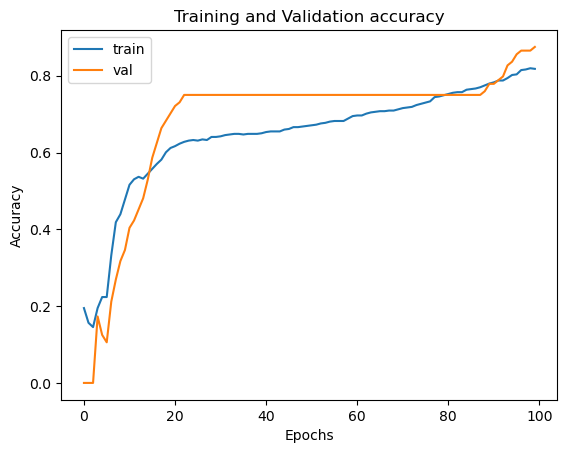

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

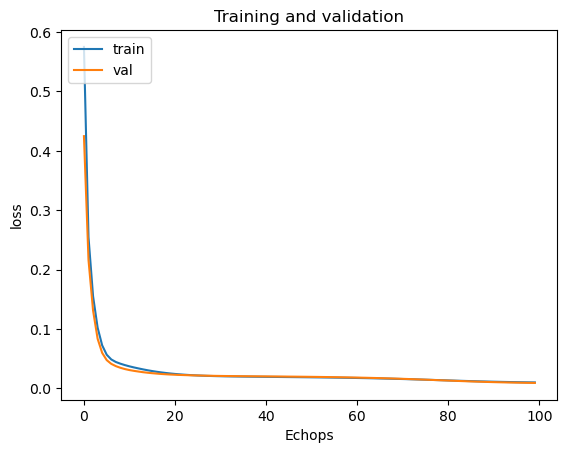

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training and validation")
plt.xlabel('Echops')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')

In [22]:
print('Actual values:')
print(' RH2M   PS  T2M_RANGE T2M_MAX T2M_MIN WS10M_RANGE')
print(pd.DataFrame(actual_y_pred))

print('Predicted values:')
print(' PRECTOT RH2M PS T2M_RANGE T2M_MAX T2M_MIN T2M WS10M_RANGE')
print(pd.DataFrame(y_pred))

Actual values:
 RH2M   PS  T2M_RANGE T2M_MAX T2M_MIN WS10M_RANGE
         0      1      2      3      4     5
0    28.05  20.58  86.94   1.43  93.94  2.38
1    27.15  21.61  88.94  13.37  93.84  2.09
2    27.75  21.22  87.44   5.92  93.68  3.09
3    27.67  21.22  89.19   3.55  93.69  3.81
4    27.94  21.11  87.75   3.20  93.78  2.55
..     ...    ...    ...    ...    ...   ...
99   27.83  13.80  75.75   0.00  94.32  5.09
100  27.69  13.29  73.25   0.00  94.26  3.02
101  27.76  14.53  73.00   0.00  94.36  3.29
102  27.84  15.41  79.44   0.00  94.49  3.80
103  27.82  17.48  79.12   0.00  94.51  3.91

[104 rows x 6 columns]
Predicted values:
 PRECTOT RH2M PS T2M_RANGE T2M_MAX T2M_MIN T2M WS10M_RANGE
             0          1          2         3          4         5
0    29.594143  19.560617  80.042458  1.594734  93.972755  2.656415
1    28.175060  19.898787  85.555992  2.391438  93.892624  2.640102
2    27.472784  21.393229  87.449310  6.599482  93.714218  2.676653
3    27.208797  20.902

In [23]:
score=model.evaluate(actual_y_pred,y_pred,verbose=0)
print("%s:"% model.metrics_names[1],score[1]*100)

accuracy: 29.807692766189575


In [24]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=6, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(x_train, y_train):
    # Fit the model on training data
    model.fit(x_train[tr], y_train[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(x_train[tt])
    results.append((prediction, tt))

4/4 [==============================] - 0s 2ms/step


In [25]:
model.predict(x_train[tt])

4/4 [==============================] - 0s 2ms/step


array([[0.36475977, 0.67306006, 0.76649415, 0.06736962, 0.5671071 ,
        0.35426083],
       [0.38807714, 0.6615682 , 0.7724012 , 0.07276495, 0.592273  ,
        0.41830614],
       [0.41493928, 0.706297  , 0.75574905, 0.09080209, 0.57083833,
        0.4451541 ],
       [0.30262363, 0.7656397 , 0.84982806, 0.1529579 , 0.49071562,
        0.46320173],
       [0.32905453, 0.7437904 , 0.79737794, 0.17132182, 0.49027273,
        0.5246077 ],
       [0.28314218, 0.69652975, 0.8374761 , 0.16716088, 0.50890917,
        0.5281303 ],
       [0.19057709, 0.6809748 , 0.86012566, 0.14874421, 0.46689194,
        0.3780414 ],
       [0.1756889 , 0.6906971 , 0.88129926, 0.18967424, 0.4462613 ,
        0.46318695],
       [0.16083205, 0.7220269 , 0.89816314, 0.23948325, 0.40068978,
        0.544865  ],
       [0.17749447, 0.67300576, 0.8544536 , 0.2018397 , 0.449505  ,
        0.5005051 ],
       [0.24282557, 0.99699324, 0.9895991 , 0.26542515, 0.27761388,
        0.49007398],
       [0.2166856 , 0